In [ ]:
import matplotlib.pyplot as plt
import numpy as np


R0 = 0.5
Ru = 20000
Cu = 20 * 10**(-6)

def comp_H(Kx, N0, l_circ):
    Kx = Kx / 1000
    I = Kx / R0
    H = (I * N0 )/ (l_circ)

    return H

def comp_B(S, Nu, Uo):
    Uo = Uo / 1000
    B = Ru * Cu * Uo / (S * Nu)

    return B


Расчет масштабов


In [ ]:
# феррит
M_1_x = comp_H(50, 40, 25 / 100)
M_1_y = comp_B(3 / (10000), 400, 20)

M_1_x, M_1_y

(16.0, 0.06666666666666667)

In [ ]:
# пермаллой
M_2_x = comp_H(20, 20, 13.3 / 100)
M_2_y = comp_B(0.8 / (10000), 300, 50)
M_2_x, M_2_y


(6.015037593984962, 0.8333333333333334)

In [ ]:
# кр. железо
M_3_x = comp_H(200, 25, 11 / 100)
M_3_y = comp_B(2 / (10000), 250, 50)
M_3_x, M_3_y


(90.9090909090909, 0.39999999999999997)

Расчет предельной индукции и коэрцитивной силы.

In [ ]:

def count_Bs(y_s, m_y):
    return y_s * m_y

def count_Hc(x_c, m_x):
    return x_c * m_x

In [ ]:
# феррит
count_Bs(6.75, M_1_y), count_Hc(1, M_1_x)

(0.45, 16.0)

In [ ]:
# пермаллой
count_Bs(3.6, M_2_y), count_Hc(3.3, M_2_x)


(3.0, 19.849624060150372)

In [ ]:
# кр. железо
count_Bs(6.75, M_3_y), count_Hc(0.6, M_3_x)


(2.6999999999999997, 54.54545454545454)

Построение графиков

In [223]:
# феррит
X_1 = [-3.8, -2.6, -2.2, -1.8, -1.4, -1.2, -0.8, -0.6, -0.6]
Y_1 = [-3.2, -3, -2.8, -2.6, -2.2, -1.6, -1.2, -0.6, -0.6]

# пермаллой
X_2 = [2.2, 2, 1.6, 1.4, 1.2, 1.2, 1]
Y_2 = [2, 1.8, 1.4, 1, 0.6, 0.4, 0.2]

# кр. железо
X_3 = [2.8, 2.6, 2.4, 2, 1.6, 1.6, 1.4, 1.4, 1, 0.8]
Y_3 = [2.2, 2, 2, 1.8, 1.8, 1.8, 1.6, 1.6, 1.4, 1.2]

In [224]:
from sklearn.linear_model import LogisticRegression

def plot(X, Y, name, degree):
    X = np.array(X)
    Y = np.array(Y)
    fig = plt.figure()
    plt.scatter(X, Y, label=name)
    
    # X = X * 10
    # Y = Y * 10

    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler()

    polyreg_scaled=make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X.reshape(-1, 1), Y)

    # model = LogisticRegression().fit(X.reshape(-1, 1), Y)
    
    X = np.arange (X.min(), X.max() + 0.05, 0.1)
    Y_PREDICTED = polyreg_scaled.predict(X.reshape(-1, 1))
    
    plt.grid()
    plt.xlabel("x, дел.")
    plt.ylabel("y, дел.")
    
    plt.plot (X, Y_PREDICTED)
    plt.legend()
    plt.savefig(name + ".png")
    plt.show()

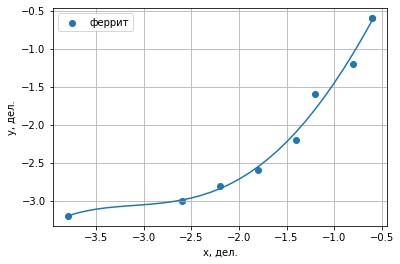

In [225]:
plot (X_1, Y_1, "феррит", 4)

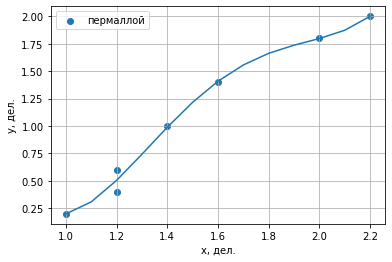

In [226]:
plot (X_2, Y_2, "пермаллой", 4)


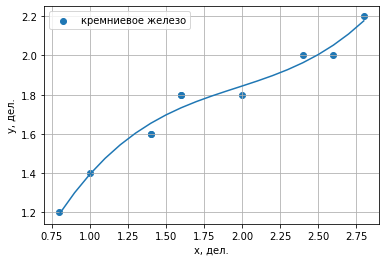

In [227]:
plot (X_3, Y_3, "кремниевое железо", 3)
